We are working with Canada’s NPRI (National Pollutant Release Inventory) dataset. It contains environmental data submitted by facilities across Canada, reporting:

How much pollutants they release into the air, land, or water.

How much waste they dispose of or transfer.

Information like facility name, location, industry classification (NAICS), year, and quantities of pollutants.

**Our Main Goal:**

Predict which industry will have the highest or lowest growth in pollutant releases over 5 years using a regression model.

Before building the model, we need to:

Clean the data.

Handle issues.

Discover patterns and prepare the dataset for time series analysis and regression.

# Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read file into notebook

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df_releases = pd.read_csv("release.csv")




<ipython-input-2-23fff4b35654>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_releases = pd.read_csv("release.csv")


In [3]:
df_disposals = pd.read_csv('Disposals.csv', low_memory=False)

High-Level Questions we need to Answer

This will guide our analysis:



1.   How do releases change over the years?
2.   Are there missing or incorrect values?
3.   What patterns can we observe in the releases or disposals?
4.   Are there features (columns) we can engineer to improve predictions?
5.   What are the top industries releasing the most pollutants?



# ***# Normalize the Column Names***

This avoids merge issues caused by accidental spaces in column names.

In [4]:
df_releases.columns = df_releases.columns.str.strip()



In [5]:
df_disposals.columns = df_disposals.columns.str.strip()

# ***# Merge & Align***

In [6]:
# Merge on key identifiers
df_merged = pd.merge(
    df_releases,
    df_disposals,
    on=[
        "Reporting_Year / Année",
        "NPRI_ID / No_INRP",
        "Company_Name / Dénomination_sociale_de_l'entreprise",
        "Facility_Name / Installation",
        "NAICS / Code_SCIAN",
        "NAICS Title / Titre Code_SCIAN",
        "PROVINCE",
        "City",
        "Latitude",
        "Longitude",
        "CAS_Number / No_CAS",
        "Substance Name (English) / Nom de substance (Anglais)",
        "Units / Unités",
        "Estimation_Method / Méthode_d’estimation"

    ],
    how="outer" , # We Use outer since we wanted to keep all data and investigate later
    suffixes=("_release", "_disposal")
)


In [7]:
df_merged.shape

(850423, 55)

In [8]:
df_merged.nunique()

,0
Reporting_Year / Année,23
NPRI_ID / No_INRP,22339
Number of employees_release,2610
Company_Name / Dénomination_sociale_de_l'entreprise,10831
Facility_Name / Installation,33119
NAICS / Code_SCIAN,408
NAICS Title / Titre Code_SCIAN,475
PROVINCE,13
City,4083
Latitude,19734


In [9]:
df_merged .head()

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees_release,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal,Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant,Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment,On-site Disposal - Land Treatment,On-site Disposal - Landfill,On-site Disposal - Tailings Management,On-site Disposal - Underground Injection,On-site Disposal - Waste Rock management
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# check the merged collumns
df_merged.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP',
       'Number of employees_release',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point',
       'Release to Air - Road dust', 'Release to Air - Spills',
       'Release to Air - Stack / Point', 'Release to Air - Storage / Handling',
       'Releases to Land - Leaks', 'Releases to Land - Other',
       'Releases to Land - Spills',
       'Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills',
       'Sum of release to all media (<1tonne)', 'Number of employees_disposal',
      

Combine 'Number of employees_release' and 'Number of employees_disposal' into a single column,
prioritizing non-missing values from 'Number of employees_release'

In [11]:
df_merged["Number of employees"] = df_merged["Number of employees_release"].combine_first(
    df_merged["Number of employees_disposal"]
)


droping the columns with missing values for 'Number of employees' and 'Number of employees_release' and 'Number of employees_disposal'  since they are not needed

In [12]:
df_merged.drop(columns=[
    "Number of employees_release", "Number of employees_disposal"
], inplace=True)




# ***# EDA & Data Cleaning***

1.    Understanding the Data

Goal: To Identify what each column represents and assess how relevant it is to pollution prediction.

Our Actions:

We Use df.info() to understand data types and missing values

We Use df.describe() for statistical summary

We Print sample rows: df.head()

We Group by industry/year to check variety:



View the First Few Rows to Understand

In [13]:
df_merged.head()

,Reporting_Year / Année,NPRI_ID / No_INRP,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,Longitude,...,Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal,Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant,Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment,On-site Disposal - Land Treatment,On-site Disposal - Landfill,On-site Disposal - Tailings Management,On-site Disposal - Underground Injection,On-site Disposal - Waste Rock management,Number of employees
0,2000,1,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440
1,2000,1,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440
2,2000,1,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440
3,2000,1,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440
4,2000,1,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440


In [14]:
df_merged['NAICS Title / Titre Code_SCIAN'].nunique()

475

In [15]:

df_merged['Reporting_Year / Année'].value_counts().sort_index()


,count
Reporting_Year / Année,
2000,12958
2001,14514
2002,28525
2003,37484
2004,38672
2005,38378
2006,40130
2007,39946
2008,39509


# ***# Issue Detection before dropping collumns***
**The Goal:** Catch problems like:

Duplicates

Missing values

Inconsistent formatting

**Our Actions:**

We Check duplicates: df.duplicated().sum()

We Check nulls: df.isna().sum()

We Check object types that should be numeric:

Duplicated Values

In [16]:
df_merged.duplicated().sum()

np.int64(0)

Missing Values accross collumns

In [17]:
df_merged.isna().sum()

,0
Reporting_Year / Année,0
NPRI_ID / No_INRP,0
Company_Name / Dénomination_sociale_de_l'entreprise,0
Facility_Name / Installation,1654
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
City,93318
Latitude,4893
Longitude,4893


In [18]:
# Check data types
print(df_merged.dtypes)


Reporting_Year / Année                                                                           int64
NPRI_ID / No_INRP                                                                                int64
Company_Name / Dénomination_sociale_de_l'entreprise                                             object
Facility_Name / Installation                                                                    object
NAICS / Code_SCIAN                                                                               int64
NAICS Title / Titre Code_SCIAN                                                                  object
PROVINCE                                                                                        object
City                                                                                            object
Latitude                                                                                       float64
Longitude                                                                

# *** (Inconsistent Formatting)***

In [19]:
# Remove non-numeric characters and convert
df_merged["Number of employees"] = pd.to_numeric(df_merged["Number of employees"], errors="coerce")




# ***Data Cleaning***

In [20]:
df_releases_clean = df_merged.copy()

In [21]:
df_releases_clean.columns = df_releases_clean.columns.str.strip()


In [22]:
release_columns = [
    "Release to Air - Fugitive",
    "Release to Air - Other Non-Point",
    "Release to Air - Road dust",
    "Release to Air - Spills",
    "Release to Air - Stack / Point",
    "Release to Air - Storage / Handling",
    "Releases to Land - Leaks",
    "Releases to Land - Other",
    "Releases to Land - Spills",
    "Releases to Water Bodies - Direct Discharges",
    "Releases to Water Bodies - Leaks",
    "Releases to Water Bodies - Spills"
]


In [23]:
#Ensure all release columns are numeric before summing to prevent errors
df_releases_clean[release_columns] = df_releases_clean[release_columns].apply(pd.to_numeric, errors="coerce")


Since the focus for our project is which industry is predicted to have the highest growth of releases in 5 years and Since Some categories such as 'Sum of release to all media (<1tonne)' have missing values, leading to incomplete analysis if considered separately.

Summing all release types will help mitigate gaps in individual columns, ensuring a more stable dataset for predictions.

In [24]:

# Strip spaces from column names in df_releases_clean to ensure they match release_columns
df_releases_clean.columns = df_releases_clean.columns.str.strip()

Why Didn't We Fill Missing Values Before Summing the Release Columns? We did NOT fill missing values before summing pollution releases because:

*Avoiding Data Fabrication*

If we filled missing pollution values before summing, we would introduce artificial pollution data. This could inflate or distort the actual pollution trends.

*Ensuring Accurate Summation*

By summing first, we only use existing reported values, keeping the dataset as true to reality as possible. Filling before summing could overestimate total pollution. Preserving Data Integrity for Feature Engineering

The "Total Releases (Summed)" column is a derived feature.

It’s better to fill missing values after summing, ensuring that all calculations are based on real, existing data.

In [25]:
#Calculate the total sum of all release types for each row (across different media: air, land, water).
# Missing values (NaN) are ignored in the summation to prevent incorrect totals.
df_releases_clean["Total Releases (Summed)"] = df_releases_clean[release_columns].sum(axis=1, skipna=True)

In [26]:
df_releases_clean.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point',
       'Release to Air - Road dust', 'Release to Air - Spills',
       'Release to Air - Stack / Point', 'Release to Air - Storage / Handling',
       'Releases to Land - Leaks', 'Releases to Land - Other',
       'Releases to Land - Spills',
       'Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills',
       'Sum of release to all media (<1tonne)',
       'Off-site Disposal - Land Treatment', 'Off-site Disposal - Landfill',

Reasons for droppping this collumns was to remove irrelevant identifiers, avoid redundancy since emissions are already summed, and improve dataset efficiency for better predictive analysis.

In [27]:
#list of collumns to drop
columns_to_drop = [
    "NPRI_ID / No_INRP", "Facility_Name / Installation","Number of employees", "City",'Latitude', 'Longitude',
    'Release to Air - Other Non-Point ', 'Release to Air - Road dust  ',
       'Release to Air - Spills ', 'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Other ',
       'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Spills ''Release to Air - Fugitive', 'Releases to Land - Leaks',
       'Releases to Water Bodies - Leaks','Sum of release to all media (<1tonne)','Releases to Water Bodies - Spills ','Release to Air - Fugitive',
    'Off-site Disposal - Land Treatment', 'Off-site Disposal - Landfill',
       'Off-site Disposal - Storage',
       'Off-site Disposal - Tailings Management',
       'Off-site Disposal - Underground Injection',
       'Off-site Disposal - Waste Rock management',
       'Off-site Transfers for Recycling - Energy Recovery',
       'Off-site Transfers for Recycling - Other',
       'Off-site Transfers for Recycling - Recovery of Acids and Bases',
       'Off-site Transfers for Recycling - Recovery of Catalysts',
       'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)',
       'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds',
       'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)',
       'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues',
       'Off-site Transfers for Recycling - Recovery of Solvents',
       'Off-site Transfers for Recycling - Refining or Re-use of Used Oil',
       'Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment',
       'Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment',
       'Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal',
       'Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant',
       'Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment',
       'On-site Disposal - Land Treatment', 'On-site Disposal - Landfill',
       'On-site Disposal - Tailings Management',
       'On-site Disposal - Underground Injection',
       'On-site Disposal - Waste Rock management' ,'Release to Air - Other Non-Point', 'Release to Air - Road dust',
       'Release to Air - Spills', 'Release to Air - Stack / Point',
       'Release to Air - Storage / Handling', 'Releases to Land - Other',
       'Releases to Land - Spills',
       'Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Spills']

# Drop the columns
df_releases_clean.drop(columns=columns_to_drop, inplace=True, errors='ignore') # Added errors='ignore' to skip non-existent columns


# ***Check Data Inconsistency***

In [28]:
#checking the data shape after dropping the collumns
df_releases_clean.shape

(850423, 10)

In [29]:
#Checking the collumns
df_releases_clean.columns

Index(['Reporting_Year / Année',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'NAICS / Code_SCIAN', 'NAICS Title / Titre Code_SCIAN', 'PROVINCE',
       'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Total Releases (Summed)'],
      dtype='object')

In [30]:
#check for duplicate
df_releases_clean.duplicated().sum()

np.int64(41527)

In [31]:
#duplicated data is dropped
df_releases_clean.drop_duplicates(inplace=True)

In [32]:
#confirm duplicated data is dropped
df_releases_clean.duplicated().sum()

np.int64(0)

In [33]:
#check data shape after dropping duplicated data
df_releases_clean.shape

(808896, 10)

In [34]:
df_releases_clean.isna().sum()

,0
Reporting_Year / Année,0
Company_Name / Dénomination_sociale_de_l'entreprise,0
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
CAS_Number / No_CAS,0
Substance Name (English) / Nom de substance (Anglais),0
Units / Unités,0
Estimation_Method / Méthode_d’estimation,0
Total Releases (Summed),0


# ***Pattern Discovery and Visualizations and Statistics***

The Goal: Find general trends and relationships before modeling.

Our Actions:

Group pollution by year:

Group by top 10 polluting industry

Group by top 10 province to see pollution distribution:

Most Released Pollutant

After dropping the unnecessary collumn, here are some of the key trends we analyzed and visualized Some of the Questions we were trying to get insights from our data

How has total pollution changed over the years?

Which industries release the most pollutants?

Which provinces contribute the most to pollution?

What are the most frequently released substances?

How are pollution levels estimated?

*Visualisations * Line chart to show pollution trends over time.

Insight Is pollution increasing or decreasing? Are there sharp spikes in certain years?

*Visualisations * Bar chart comparing total pollution by province.

Insights: Which province has the highest pollution? Are certain provinces much cleaner than others?

*Visualisations * Bar chart of top 10 pollutants released.

Insights: Which chemicals are most commonly released? Are some pollutants more dominant in certain industries?

*Visualisations * Pie chart showing distribution of estimation methods.

Insights: Are most values estimated using monitoring or calculations? Are some industries more likely to estimate pollution rather than measure it?

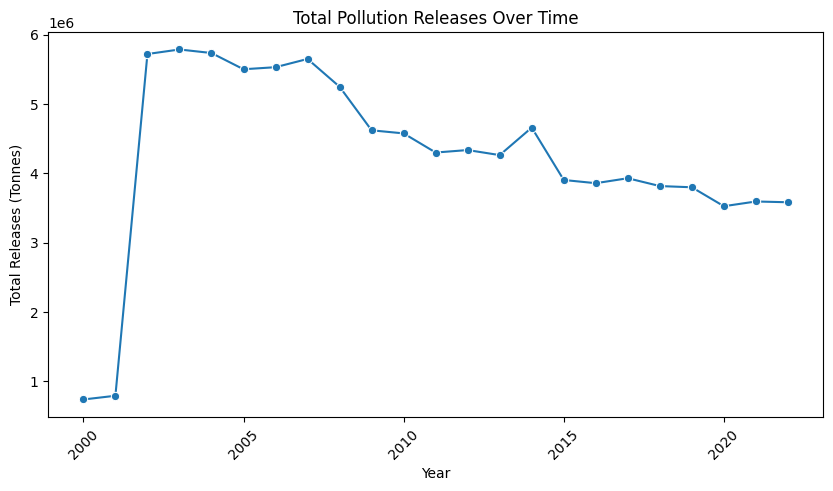

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year to see the total pollution trend over time
yearly_trend = df_releases_clean.groupby("Reporting_Year / Année")["Total Releases (Summed)"].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x="Reporting_Year / Année", y="Total Releases (Summed)", marker="o")
plt.title("Total Pollution Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Total Releases (Tonnes)")
plt.xticks(rotation=45)
plt.show()



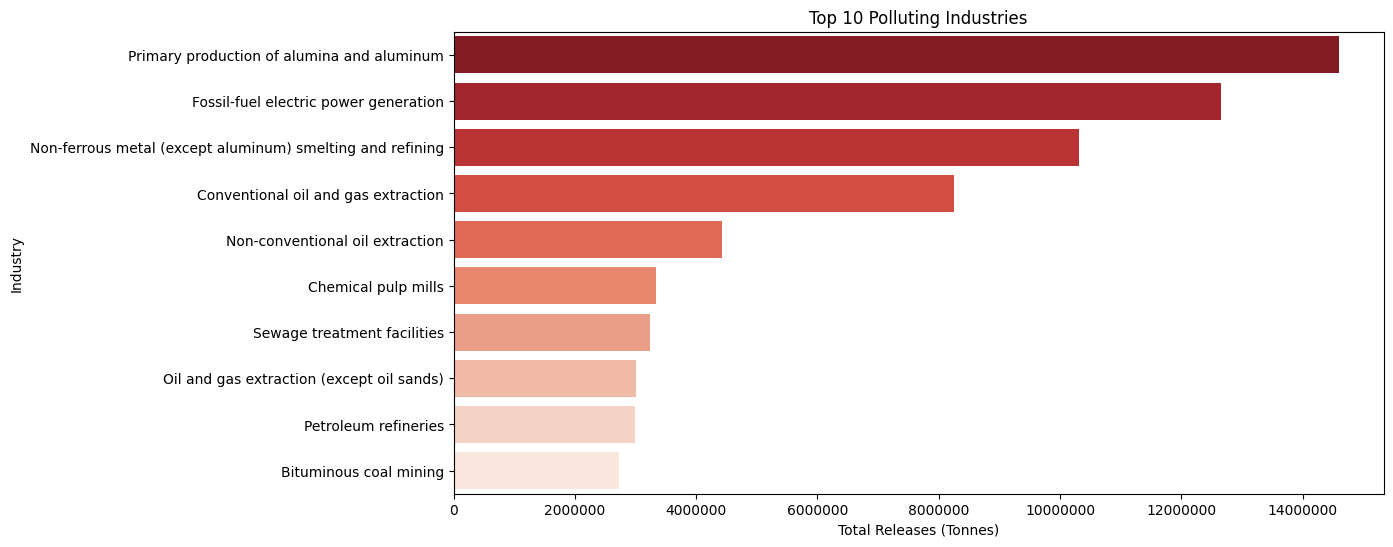

In [36]:
# Group by industry to find top polluting industries
top_industries = df_releases_clean.groupby("NAICS Title / Titre Code_SCIAN")["Total Releases (Summed)"].sum().nlargest(10)

# Plot the industries
# Corrected Top Polluting Industries Graph

plt.figure(figsize=(12, 6))
sns.barplot(x=top_industries.values, y=top_industries.index, hue=top_industries.index, legend=False, palette="Reds_r")
plt.title("Top 10 Polluting Industries")
plt.xlabel("Total Releases (Tonnes)")
plt.ylabel("Industry")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

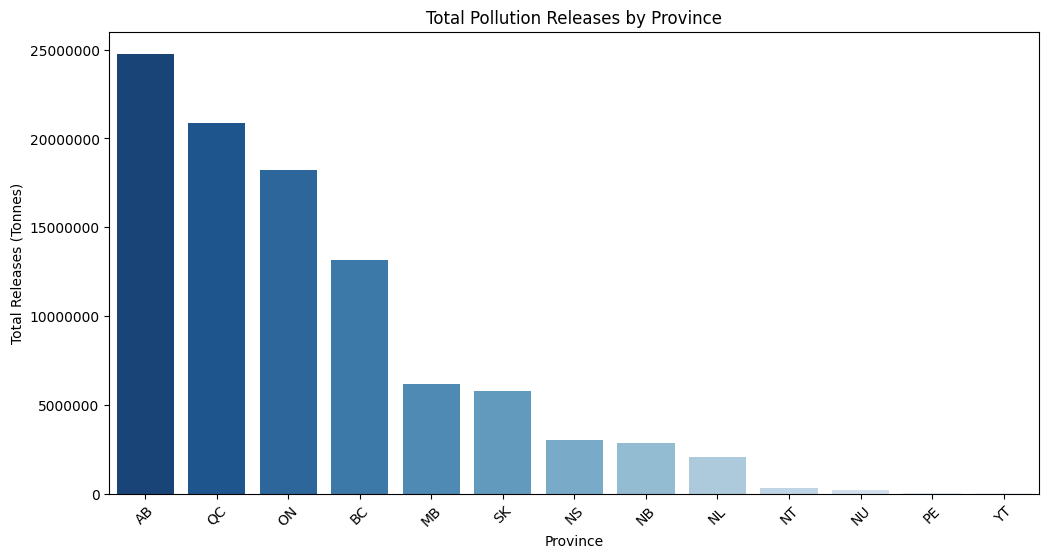

In [37]:
# Group by province to see pollution distribution
province_pollution = df_releases_clean.groupby("PROVINCE")["Total Releases (Summed)"].sum().sort_values(ascending=False)



#Bar Plot for Pollution by Province

plt.figure(figsize=(12, 6))
sns.barplot(x=province_pollution.index, y=province_pollution.values, hue=province_pollution.index, legend=False, palette="Blues_r")
plt.title("Total Pollution Releases by Province")
plt.xlabel("Province")
plt.ylabel("Total Releases (Tonnes)")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


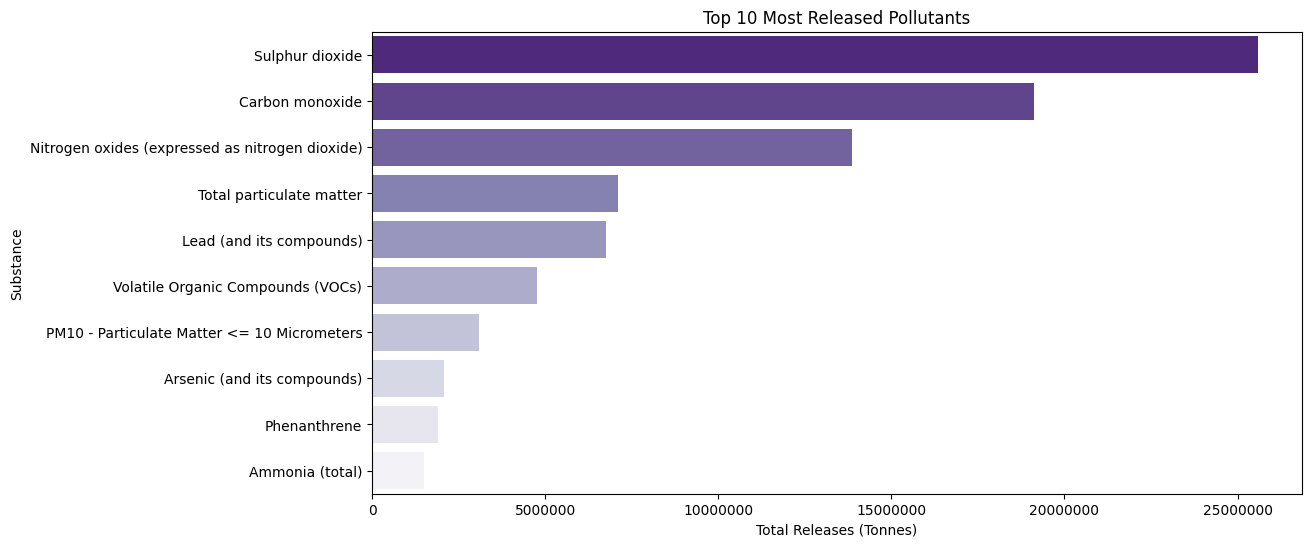

In [38]:
# Group by substance name to find the most released pollutants
top_pollutants = df_releases_clean.groupby("Substance Name (English) / Nom de substance (Anglais)")["Total Releases (Summed)"].sum().nlargest(10)

# Plot the pollutants
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_pollutants.values,
    y=top_pollutants.index,
    hue=top_pollutants.index,  # Assigning hue to the y variable
    legend=False,
    palette="Purples_r"
)
plt.title("Top 10 Most Released Pollutants")
plt.xlabel("Total Releases (Tonnes)")
plt.ylabel("Substance")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

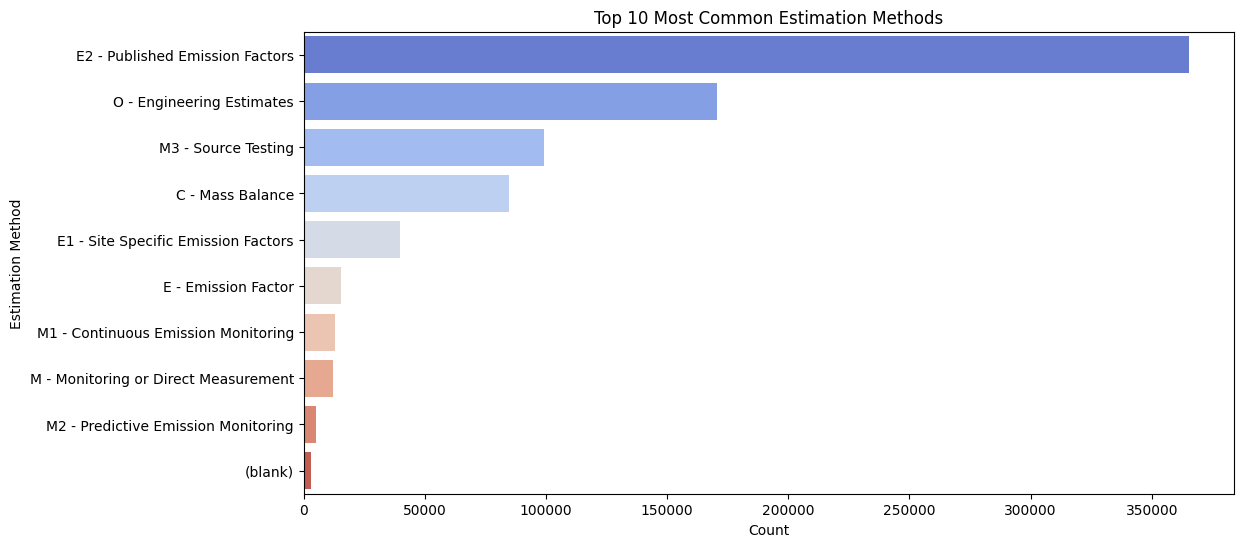

In [39]:
# Count the top 10 most common estimation methods
top_estimation_methods = df_releases_clean["Estimation_Method / Méthode_d’estimation"].value_counts().nlargest(10)

# Plot the top estimation methods
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_estimation_methods.values,
    y=top_estimation_methods.index,
    hue=top_estimation_methods.index,  # Assign hue to avoid deprecation warning
    legend=False,
    palette="coolwarm"
)
plt.title("Top 10 Most Common Estimation Methods")
plt.xlabel("Count")
plt.ylabel("Estimation Method")
plt.show()


# Fixing Bad Housekeeping

Goal: Clean or drop irrelevant/low-quality columns

Our Actions:

Drop any unnecessary columns

Standardize column names:

In [40]:
df_releases_clean.columns = df_releases_clean.columns.str.strip()

# Handling Outliers
Goal: Detect and decide whether to drop or keep high-emission outliers.

Our Actions:
Use boxplot
Identify high-end outliers

 *Explanation of Outliers in Pollutant Releases Cause:*

Certain industries inherently release high levels of pollutants, leading to extreme values. Industries like oil refineries, power plants, and mining operations contribute the most pollution.

Example: Aluminum and metal production → Extremely high emissions. Oil extraction → Releases large quantities of pollutants into air, land, and water.

Evidence from Data: The top 1% of polluters come from energy, mining, and chemical processing industries.




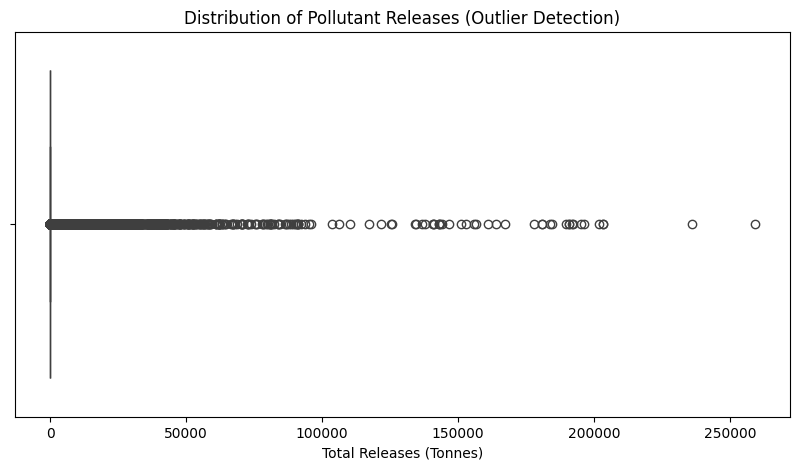

In [41]:
# Identifying industries with unusually high emissions (Outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_releases_clean, x="Total Releases (Summed)", showfliers=True)
plt.title("Distribution of Pollutant Releases (Outlier Detection)")
plt.xlabel("Total Releases (Tonnes)")
plt.show()


In [42]:
# Identifying top industries with extreme pollution values (outliers)
outlier_threshold = df_releases_clean["Total Releases (Summed)"].quantile(0.99)  # Top 1% as outliers
outlier_industries = df_releases_clean[df_releases_clean["Total Releases (Summed)"] > outlier_threshold]

# Displaying outlier industries
print("Top Industries with Extreme Pollution Levels:")
print(outlier_industries["NAICS Title / Titre Code_SCIAN"].value_counts())


Top Industries with Extreme Pollution Levels:
NAICS Title / Titre Code_SCIAN
Primary production of alumina and aluminum                          1041
Fossil-fuel electric power generation                               1007
Non-ferrous metal (except aluminum) smelting and refining            493
Conventional oil and gas extraction                                  458
Petroleum refineries                                                 450
                                                                    ... 
Other animal food manufacturing                                        1
Power and communication line and related structures construction       1
Sand and gravel mining and quarrying                                   1
All other electrical equipment and component manufacturing             1
All other support services                                             1
Name: count, Length: 93, dtype: int64


This code below finds the 99th percentile value of Total Releases (Summed). The 99th percentile means that only 1% of the highest pollution values exceed this threshold. This helps us define extreme pollution levels.

Why?

Helps identify industries or facilities responsible for extreme pollution. Allows us to analyze if these values are valid or data errors.

In [43]:
outlier_threshold = df_releases_clean["Total Releases (Summed)"].quantile(0.99)
df_releases_clean[df_releases_clean["Total Releases (Summed)"] > outlier_threshold].head(10)

,Reporting_Year / Année,Company_Name / Dénomination_sociale_de_l'entreprise,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Units / Unités,Estimation_Method / Méthode_d’estimation,Total Releases (Summed)
315,2000,Communaute urbaine de Quebec,562210,Waste treatment and disposal,QC,118-74-1,Hexachlorobenzene,grams,E - Emission Factor,8000.000
979,2000,INCO LIMITED,212232,Nickel-copper ore mining,ON,7664-93-9,Sulphuric acid,tonnes,M - Monitoring or Direct Measurement,2710.000
1402,2000,NORSK HYDRO CANADA INC.,331410,Non-ferrous metal (except aluminum) smelting a...,QC,118-74-1,Hexachlorobenzene,grams,M - Monitoring or Direct Measurement,2081.000
1433,2000,City of Ottawa,221320,Sewage treatment facilities,ON,NA - 16,Ammonia (total),tonnes,M - Monitoring or Direct Measurement,1981.000
1755,2000,ATCO ELECTRIC,221112,Fossil-fuel electric power generation,AB,118-74-1,Hexachlorobenzene,grams,E - Emission Factor,1650.259
1769,2000,Sheerness Generating Station,221112,Fossil-fuel electric power generation,AB,118-74-1,Hexachlorobenzene,grams,E - Emission Factor,2009.000
1841,2000,Aluminerie de Bécancour inc.,331313,Primary production of alumina and aluminum,QC,NA - P/H,"PAHs, total unspeciated",kg,M - Monitoring or Direct Measurement,2081.000
2484,2000,Greater Vancouver Sewerage and Drainage District,221320,Sewage treatment facilities,BC,NA - 16,Ammonia (total),tonnes,M - Monitoring or Direct Measurement,4310.000
3577,2000,Ontario Power Generation Inc,221112,Fossil-fuel electric power generation,ON,7647-01-0,Hydrochloric acid,tonnes,E - Emission Factor,1847.867
3624,2000,Ontario Power Generation Inc,221112,Fossil-fuel electric power generation,ON,7647-01-0,Hydrochloric acid,tonnes,E - Emission Factor,6781.511


We identified industries with extreme pollution levels (Top 1% of "Total Releases (Summed)"), but we needed to decide whether to keep, remove, or adjust them.

so we Analyze the Top Polluting Industries to confirm if These industries are naturally high-polluting.

In [44]:
# Define outlier threshold (top 1% pollution values)
outlier_threshold = df_releases_clean["Total Releases (Summed)"].quantile(0.99)

# Extract outlier industries
outliers = df_releases_clean[df_releases_clean["Total Releases (Summed)"] > outlier_threshold]

# Display top 10 outliers
print("Top 10 Industries with Extreme Pollution Levels:")
print(outliers["NAICS Title / Titre Code_SCIAN"].value_counts().head(10))

Top 10 Industries with Extreme Pollution Levels:
NAICS Title / Titre Code_SCIAN
Primary production of alumina and aluminum                   1041
Fossil-fuel electric power generation                        1007
Non-ferrous metal (except aluminum) smelting and refining     493
Conventional oil and gas extraction                           458
Petroleum refineries                                          450
Non-conventional oil extraction                               449
Sewage treatment facilities                                   393
Cement manufacturing                                          377
Chemical pulp mills                                           358
Iron and steel mills and ferro-alloy manufacturing            307
Name: count, dtype: int64


We Compared Outlier Impact on the Dataset Before deciding, we checked how much of the total pollution these industries contribute: If outliers contribute <70%, we keep them in the dataset.

In [45]:
# Calculate total pollution for top outliers
total_pollution = df_releases_clean["Total Releases (Summed)"].sum()
top_10_pollution = outliers["Total Releases (Summed)"].sum()

# Percentage of total pollution from outliers
percentage_contributed = (top_10_pollution / total_pollution) * 100
print(f"Top 10 industries contribute {percentage_contributed:.2f}% of total pollution.")

Top 10 industries contribute 66.95% of total pollution.


The line chart shows the pollution levels from Sewage Treatment Facilities over time (2000-2022). Here are the key insights:

Sharp Increase (2000-2003)

Pollution jumped from ~20,000 to 120,000 tonnes. This suggests a major change in waste treatment capacity or reporting policies.

Steady Growth (2003-2013)

Pollution remained relatively stable, fluctuating between 120,000 and 140,000 tonnes. Minor dips could be due to process improvements or regulation changes.

Sudden Spike in 2014 (~180,000 tonnes)

This sharp increase suggests either: More facilities reporting emissions. New treatment processes leading to higher recorded pollution.

Stable But High Levels (2015-2022)

Pollution remains high (180,000-200,000 tonnes). Indicates increasing wastewater treatment demand.

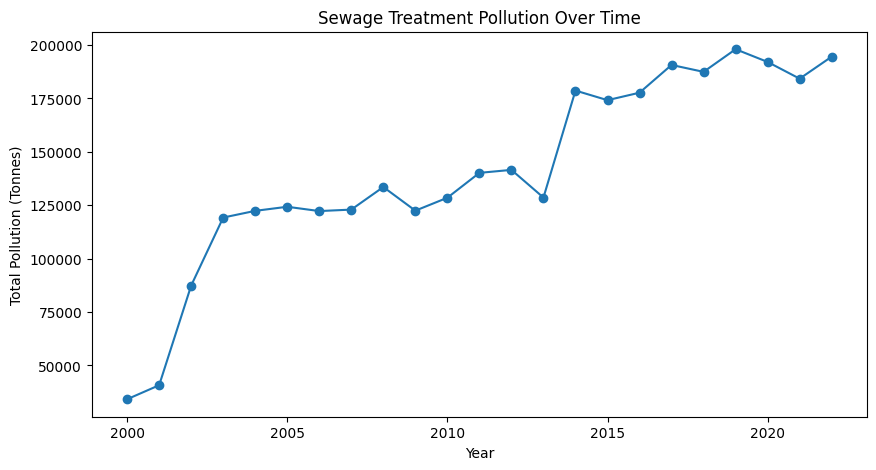

In [46]:
sewage_trend = df_releases_clean[df_releases_clean["NAICS Title / Titre Code_SCIAN"] == "Sewage treatment facilities"]
sewage_trend.groupby("Reporting_Year / Année")["Total Releases (Summed)"].sum().plot(figsize=(10, 5), marker="o", title="Sewage Treatment Pollution Over Time")
plt.xlabel("Year")
plt.ylabel("Total Pollution (Tonnes)")
plt.show()


# Feature Engineering

The Goal: Create new features that help detect patterns or predict Growth

In [47]:
# Years since 2000
df_releases_clean["Years Since 2000"] = df_releases_clean["Reporting_Year / Année"] - 2000


In [48]:
# Previous Year Pollution
df_releases_clean.sort_values(["NAICS / Code_SCIAN", "Reporting_Year / Année"], inplace=True)
df_releases_clean["Prev_Year_Pollution"] = df_releases_clean.groupby("NAICS / Code_SCIAN")["Total Releases (Summed)"].shift(1)

In [49]:
# Growth Rate
df_releases_clean["Growth Rate (%)"] = df_releases_clean.groupby("NAICS / Code_SCIAN")["Total Releases (Summed)"].pct_change() * 100

High Emission Industry
Flag top 10 industries that contributed most to pollution.

In [50]:
# Step 1: Find top 10 emitters
top_industries = (
    df_releases_clean.groupby("NAICS Title / Titre Code_SCIAN")["Total Releases (Summed)"]
    .sum()
    .nlargest(10)
    .index
)

# Step 2: Create binary flag
df_releases_clean["High Emission Industry"] = df_releases_clean["NAICS Title / Titre Code_SCIAN"].isin(top_industries).astype(int)


Is COVID Year
Flag rows for 2020 and 2021

In [51]:
df_releases_clean["Is_COVID_Year"] = df_releases_clean["Reporting_Year / Année"].isin([2020, 2021]).astype(int)


Region (East, West, North, Central)

Group provinces into broader Canadian regions



In [52]:
region_map = {
    "BC": "West", "AB": "West", "SK": "West", "MB": "Central",
    "ON": "Central", "QC": "East", "NB": "East", "NS": "East", "PE": "East", "NL": "East",
    "YT": "North", "NT": "North", "NU": "North"
}

df_releases_clean["Region"] = df_releases_clean["PROVINCE"].map(region_map)


In [53]:
df_releases_clean.columns

Index(['Reporting_Year / Année',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'NAICS / Code_SCIAN', 'NAICS Title / Titre Code_SCIAN', 'PROVINCE',
       'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Total Releases (Summed)', 'Years Since 2000', 'Prev_Year_Pollution',
       'Growth Rate (%)', 'High Emission Industry', 'Is_COVID_Year', 'Region'],
      dtype='object')

Estimation Method Type

Simplify estimation methods into general categories (Direct, Estimated, Unknown)

In [54]:
def simplify_method(method):
    if method.startswith("M"):  # Monitoring-based
        return "Direct"
    elif method.startswith("E") or method.startswith("O") or method.startswith("C"):
        return "Estimated"
    elif method in ["NI - No Information Available", "NA - Not Applicable"]:
        return "Unknown"
    else:
        return "Other"

df_releases_clean["Estimation_Method_Type"] = df_releases_clean["Estimation_Method / Méthode_d’estimation"].apply(simplify_method)


In [55]:
#**Categorizing Industries by Pollution Levels (Low, Medium, High)**
# Define thresholds based on quantiles
low_threshold = df_releases_clean["Total Releases (Summed)"].quantile(0.33)
high_threshold = df_releases_clean["Total Releases (Summed)"].quantile(0.66)

def categorize_pollution(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

df_releases_clean["Pollution Category"] = df_releases_clean["Total Releases (Summed)"].apply(categorize_pollution)

In [56]:
df_releases_clean = df_releases_clean.sort_values(["NAICS Title / Titre Code_SCIAN", "Reporting_Year / Année"])

In [57]:
# Lag pollution category
df_releases_clean["Prev_Year_Category"] = df_releases_clean.groupby("NAICS Title / Titre Code_SCIAN")["Pollution Category"].shift(1)

In [58]:
# Lag growth rate
df_releases_clean["Prev_Year_Growth"] = df_releases_clean.groupby("NAICS Title / Titre Code_SCIAN")["Growth Rate (%)"].shift(1)

In [59]:
df_releases_clean.columns

Index(['Reporting_Year / Année',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'NAICS / Code_SCIAN', 'NAICS Title / Titre Code_SCIAN', 'PROVINCE',
       'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Total Releases (Summed)', 'Years Since 2000', 'Prev_Year_Pollution',
       'Growth Rate (%)', 'High Emission Industry', 'Is_COVID_Year', 'Region',
       'Estimation_Method_Type', 'Pollution Category', 'Prev_Year_Category',
       'Prev_Year_Growth'],
      dtype='object')

In [60]:
df_releases_clean.shape

(808896, 20)

Droping some unncessary collumns after feature engineering

In [61]:
drop_columns = ['Company_Name / Dénomination_sociale_de_l\'entreprise',
       'Substance Name (English) / Nom de substance (Anglais)',
       'CAS_Number / No_CAS', 'NAICS / Code_SCIAN','Units / Unités']

df_releases_clean.drop(columns=drop_columns, inplace=True)

In [62]:
df_releases_clean.isnull().sum()

,0
Reporting_Year / Année,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
Estimation_Method / Méthode_d’estimation,0
Total Releases (Summed),0
Years Since 2000,0
Prev_Year_Pollution,408
Growth Rate (%),83256
High Emission Industry,0
Is_COVID_Year,0


Strategy to Handle Missing Values after feature encoding

for Prev_Year_Pollution , Growth Rate (%), Prev_Year_Category and Prev_Year_Growth

We Use industry-specific median – because pollution levels vary a lot by industry.

Growth Rate (%)
Same logic applies — We fill using industry-specific median growth rate.


In [63]:
df_releases_clean["Prev_Year_Pollution"] = df_releases_clean.groupby("NAICS Title / Titre Code_SCIAN")["Prev_Year_Pollution"].transform(lambda x: x.fillna(x.median()))

# Fill remaining with 0 (e.g., if median couldn't be computed)
df_releases_clean["Prev_Year_Pollution"] = df_releases_clean["Prev_Year_Pollution"].fillna(0)


In [64]:
df_releases_clean['Prev_Year_Pollution'].isnull().sum()

np.int64(0)

In [65]:
df_releases_clean["Growth Rate (%)"] = df_releases_clean.groupby("NAICS Title / Titre Code_SCIAN")["Growth Rate (%)"].transform(lambda x: x.fillna(x.median()))

df_releases_clean["Growth Rate (%)"] = df_releases_clean["Growth Rate (%)"].fillna(0)


In [66]:
df_releases_clean['Growth Rate (%)' ].isnull().sum()

np.int64(0)

Prev_Year_Category and Prev_Year_Growth are lag features, so the first year of each industry has no previous data, resulting in NaN.

This is normal and expected.

Fill with Industry-Specific Median
This keeps the filling meaningful within each industry segment.

In [67]:
# First, map pollution categories to numbers
category_map = {"Low": 1, "Medium": 2, "High": 3}
df_releases_clean["Prev_Year_Category"] = df_releases_clean["Prev_Year_Category"].map(category_map)

In [68]:
# Fill by industry median
df_releases_clean["Prev_Year_Category"] = df_releases_clean.groupby("NAICS Title / Titre Code_SCIAN")["Prev_Year_Category"].transform(lambda x: x.fillna(x.median()))
df_releases_clean["Prev_Year_Growth"] = df_releases_clean.groupby("NAICS Title / Titre Code_SCIAN")["Prev_Year_Growth"].transform(lambda x: x.fillna(x.median()))


In [69]:
df_releases_clean["Prev_Year_Category"] = df_releases_clean["Prev_Year_Category"].fillna(0)
df_releases_clean["Prev_Year_Growth"] = df_releases_clean["Prev_Year_Growth"].fillna(0)


In [70]:
df_releases_clean.isnull().sum()

,0
Reporting_Year / Année,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
Estimation_Method / Méthode_d’estimation,0
Total Releases (Summed),0
Years Since 2000,0
Prev_Year_Pollution,0
Growth Rate (%),0
High Emission Industry,0
Is_COVID_Year,0


In [71]:
#categorical collumns
categorical_columns = df_releases_clean.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['NAICS Title / Titre Code_SCIAN', 'PROVINCE',
       'Estimation_Method / Méthode_d’estimation', 'Region',
       'Estimation_Method_Type', 'Pollution Category'],
      dtype='object')


In [72]:
#numerical collumns
numerical_columns = df_releases_clean.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Reporting_Year / Année', 'Total Releases (Summed)', 'Years Since 2000',
       'Prev_Year_Pollution', 'Growth Rate (%)', 'High Emission Industry',
       'Is_COVID_Year', 'Prev_Year_Category', 'Prev_Year_Growth'],
      dtype='object')


# Feature Encoding

In [73]:
df_encoded = df_releases_clean.copy()

Label Encode Categorical Features

In [74]:
from sklearn.preprocessing import LabelEncoder

label_cols = [
    "Region",
    "NAICS Title / Titre Code_SCIAN",
    "Estimation_Method_Type",
    "Estimation_Method / Méthode_d’estimation",
    "PROVINCE"
]

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])



Since classification involves predicting Pollution Category (e.g., Low, Medium, High), we will also convert that


In [75]:
df_encoded["Pollution Category"] = df_encoded["Pollution Category"].map({"Low": 1, "Medium": 2, "High": 3})


In [76]:
df_encoded.head()

,Reporting_Year / Année,NAICS Title / Titre Code_SCIAN,PROVINCE,Estimation_Method / Méthode_d’estimation,Total Releases (Summed),Years Since 2000,Prev_Year_Pollution,Growth Rate (%),High Emission Industry,Is_COVID_Year,Region,Estimation_Method_Type,Pollution Category,Prev_Year_Category,Prev_Year_Growth
5211,2000,0,8,5,0.039,0,0.176,-38.986503,0,0,0,0,1,1.0,-38.910506
5212,2000,0,8,11,0.125,0,0.039,220.512821,0,0,0,1,1,1.0,-38.910506
5213,2000,0,8,11,0.028,0,0.125,-77.600000,0,0,0,1,1,1.0,220.512821
6263,2000,0,8,1,10.100,0,0.028,35971.428571,0,0,0,1,2,1.0,-77.600000
6264,2000,0,8,2,0.532,0,10.100,-94.732673,0,0,0,1,2,2.0,35971.428571


In [77]:
# Check for missing values
print(df_encoded[numerical_columns].isnull().sum())

Reporting_Year / Année     0
Total Releases (Summed)    0
Years Since 2000           0
Prev_Year_Pollution        0
Growth Rate (%)            0
High Emission Industry     0
Is_COVID_Year              0
Prev_Year_Category         0
Prev_Year_Growth           0
dtype: int64


In [78]:
print((df_encoded[numerical_columns] == -np.inf).sum())

Reporting_Year / Année     0
Total Releases (Summed)    0
Years Since 2000           0
Prev_Year_Pollution        0
Growth Rate (%)            0
High Emission Industry     0
Is_COVID_Year              0
Prev_Year_Category         0
Prev_Year_Growth           0
dtype: int64


In [79]:
# Replace infinite values with NaN
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)


In [80]:
# Drop rows with NaN values in numerical features before scaling
df_encoded.dropna(subset=numerical_columns, inplace=True)

# Standardization/Scaling


We do NOT need to scale every column. The reason we only scale "Total Releases (Summed)" and "Growth Rate (%)" is because:Total Releases (Summed) → Pollution levels have a large numerical range (e.g., 0.01 to 100,000+ tonnes).

We scale features that are continuous and have a wide range

In [81]:
from sklearn.preprocessing import StandardScaler

numerical_to_scale = [
    "Total Releases (Summed)",
    "Prev_Year_Pollution",
    "Growth Rate (%)",
    "Prev_Year_Growth"
]


scaler = StandardScaler()
df_encoded[numerical_to_scale] = scaler.fit_transform(df_encoded[numerical_to_scale])


In [82]:
df_encoded.head()

,Reporting_Year / Année,NAICS Title / Titre Code_SCIAN,PROVINCE,Estimation_Method / Méthode_d’estimation,Total Releases (Summed),Years Since 2000,Prev_Year_Pollution,Growth Rate (%),High Emission Industry,Is_COVID_Year,Region,Estimation_Method_Type,Pollution Category,Prev_Year_Category,Prev_Year_Growth
5211,2000,0,8,5,-0.068235,0,-0.071647,-0.00169,0,0,0,0,1,1.0,-0.001749
5212,2000,0,8,11,-0.068182,0,-0.071726,-0.00169,0,0,0,1,1,1.0,-0.001749
5213,2000,0,8,11,-0.068242,0,-0.071677,-0.00169,0,0,0,1,1,1.0,-0.001749
6263,2000,0,8,1,-0.062071,0,-0.071733,-0.00168,0,0,0,1,2,1.0,-0.001749
6264,2000,0,8,2,-0.067933,0,-0.065929,-0.00169,0,0,0,1,2,2.0,-0.001739


In [83]:
df_encoded.columns

Index(['Reporting_Year / Année', 'NAICS Title / Titre Code_SCIAN', 'PROVINCE',
       'Estimation_Method / Méthode_d’estimation', 'Total Releases (Summed)',
       'Years Since 2000', 'Prev_Year_Pollution', 'Growth Rate (%)',
       'High Emission Industry', 'Is_COVID_Year', 'Region',
       'Estimation_Method_Type', 'Pollution Category', 'Prev_Year_Category',
       'Prev_Year_Growth'],
      dtype='object')

In [84]:
df_classification = df_encoded.copy()

# Feature Selection for Classification Model

Define Features  and Target Columns

Classification →  predicting "Pollution Category"

Regression →  predicting "Total Releases (Summed)" in future years

Set up your features and target:


Before training a model, we separate features (X) from the target variable (y).

We want to predict whether pollution is Low, Medium, or High. "Pollution Category" is our target variable (classification).

In [85]:
features = [
    "Reporting_Year / Année",
    "NAICS Title / Titre Code_SCIAN",
    "PROVINCE",
    "Estimation_Method / Méthode_d’estimation",
    "Years Since 2000",
    "Prev_Year_Pollution",
    'Growth Rate (%)',
    "Prev_Year_Growth",
    "High Emission Industry",
    "Is_COVID_Year",
    "Region",
    "Estimation_Method_Type",
    "Prev_Year_Category"
]

target = "Pollution Category"


In [86]:
# Check correlations
correlation = df_classification.corr(numeric_only=True)["Pollution Category"].sort_values(ascending=False)

# Show strongest correlations
print(correlation.head(10))

Pollution Category         1.000000
Prev_Year_Category         0.523099
High Emission Industry     0.236110
Region                     0.201652
Total Releases (Summed)    0.078690
Prev_Year_Pollution        0.040292
Estimation_Method_Type     0.028589
Reporting_Year / Année     0.004256
Years Since 2000           0.004256
Growth Rate (%)            0.001960
Name: Pollution Category, dtype: float64


Prepare Final Feature (X) and Target (y)

In [87]:
X = df_classification[features]
y = df_classification[target]


In [88]:
X.head()

,Reporting_Year / Année,NAICS Title / Titre Code_SCIAN,PROVINCE,Estimation_Method / Méthode_d’estimation,Years Since 2000,Prev_Year_Pollution,Growth Rate (%),Prev_Year_Growth,High Emission Industry,Is_COVID_Year,Region,Estimation_Method_Type,Prev_Year_Category
5211,2000,0,8,5,0,-0.071647,-0.00169,-0.001749,0,0,0,0,1.0
5212,2000,0,8,11,0,-0.071726,-0.00169,-0.001749,0,0,0,1,1.0
5213,2000,0,8,11,0,-0.071677,-0.00169,-0.001749,0,0,0,1,1.0
6263,2000,0,8,1,0,-0.071733,-0.00168,-0.001749,0,0,0,1,1.0
6264,2000,0,8,2,0,-0.065929,-0.00169,-0.001739,0,0,0,1,2.0


In [89]:
y.head()

,Pollution Category
5211,1
5212,1
5213,1
6263,2
6264,2


# Classification Model

# **Time-Based Train-Test Split for Classification Model**

Time-Based Split
Use temporal train-test split (not random) to preserve time order:

We train on early years and test on recent years — this respects time order

In [90]:
split_year = 2019  #  train on data before 2020
X_train = X[df_classification["Reporting_Year / Année"] <= split_year]
X_test = X[df_classification["Reporting_Year / Année"] > split_year]

y_train = y[df_classification["Reporting_Year / Année"] <= split_year]
y_test = y[df_classification["Reporting_Year / Année"] > split_year]


# Model Selection-- Random Forest Classifier


Now, we choose a model based on our task:

For Classification (Pollution Category)

Why Random Forest?

Handles categorical & numerical data well.

Works without needing complex feature engineering. Provides feature importance insights.

Random Forest is our starting point

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Hyper parameter Tunning for Classification Model

In [92]:

# Define parameter grid
n_estimators = [ 50, 100]
max_depth = [10, 20]
min_samples_split = [2, 5]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [93]:

rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_clf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Fit grid search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=1)

# Classification Model Evaluation

In [94]:
# Best model from grid search
best_rf = grid_search.best_estimator_

In [95]:
# Predict and evaluate
y_pred = best_rf.predict(X_test)
print("Best Parameters:\n", grid_search.best_params_)

Best Parameters:
 {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}


In [96]:
score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)

Accuracy: 0.9829248712374733


In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.99      0.98      0.98     33008
           2       0.98      0.98      0.98     44644
           3       0.99      0.99      0.99     33211

    accuracy                           0.98    110863
   macro avg       0.98      0.98      0.98    110863
weighted avg       0.98      0.98      0.98    110863



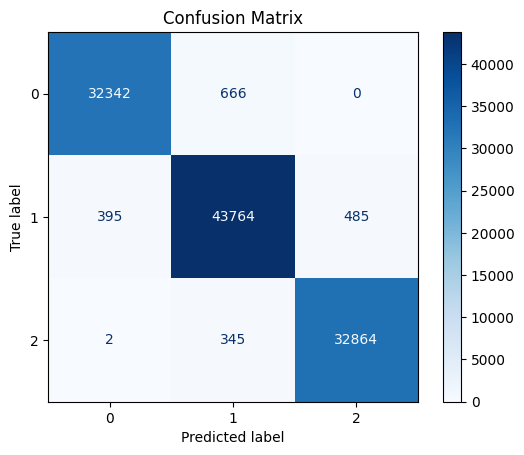

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [99]:
df_regression = df_encoded.copy()

In [100]:
df_regression.to_csv('df_regression.csv', index=False)

# Feature Selection for Regression Model

In [101]:
# Select features and target for regression
features = [
    "Reporting_Year / Année",
    "NAICS Title / Titre Code_SCIAN",
    "PROVINCE",
    "Estimation_Method / Méthode_d’estimation",
    "Years Since 2000",
    "Prev_Year_Pollution",
    'Growth Rate (%)',
    "Prev_Year_Growth",
    "High Emission Industry",
    "Is_COVID_Year",
    "Region",
    "Pollution Category",
    "Estimation_Method_Type",
    "Prev_Year_Category"
]

target = "Total Releases (Summed)"

In [102]:
X = df_regression.drop(columns=[target])
y = df_regression[target]

In [103]:
X.head()

,Reporting_Year / Année,NAICS Title / Titre Code_SCIAN,PROVINCE,Estimation_Method / Méthode_d’estimation,Years Since 2000,Prev_Year_Pollution,Growth Rate (%),High Emission Industry,Is_COVID_Year,Region,Estimation_Method_Type,Pollution Category,Prev_Year_Category,Prev_Year_Growth
5211,2000,0,8,5,0,-0.071647,-0.00169,0,0,0,0,1,1.0,-0.001749
5212,2000,0,8,11,0,-0.071726,-0.00169,0,0,0,1,1,1.0,-0.001749
5213,2000,0,8,11,0,-0.071677,-0.00169,0,0,0,1,1,1.0,-0.001749
6263,2000,0,8,1,0,-0.071733,-0.00168,0,0,0,1,2,1.0,-0.001749
6264,2000,0,8,2,0,-0.065929,-0.00169,0,0,0,1,2,2.0,-0.001739


In [104]:
y.head()

,Total Releases (Summed)
5211,-0.068235
5212,-0.068182
5213,-0.068242
6263,-0.062071
6264,-0.067933


# ***Time-Based Train-Test Split for Regression Model 1***

X_train contains only the feature columns for years up to 2019

y_train contains the target column for those same years

In [105]:
# Time-aware train-test split using year <= 2019 for training
split_year = 2019
X_train = X[df_regression["Reporting_Year / Année"] <= split_year]
X_test = X[df_regression["Reporting_Year / Année"] > split_year]
y_train = y[df_regression["Reporting_Year / Année"] <= split_year]
y_test = y[df_regression["Reporting_Year / Année"] > split_year]


# ***Hyperparameter Tunning for Regression Model 1***

In [106]:
# define parameter grid
n_estimators = [50]
max_depth = [ 20]
min_samples_split = [ 5]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

# **Model 1: Random Forest **

In [107]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor( random_state=42)
grid_search_2 = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=1)
grid_search_2.fit(X_train, y_train)







Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20], 'min_samples_split': [5],
                         'n_estimators': [50]},
             verbose=1)

In [109]:
# Get the best model from GridSearchCV
rf_model = grid_search_2.best_estimator_

In [110]:
# Predict and evaluate
y_rf_pred = rf_model.predict(X_test)


In [111]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)
rf_mae = mean_absolute_error(y_test, y_rf_pred)

print("Random Forest Metrics:")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)
print("MAE:", rf_mae)


Random Forest Metrics:
MSE: 0.02921103449213144
R2 Score: 0.9147095103854042
MAE: 0.0037843897026588517


# Scatter Plot

The scatter plot of actual vs. predicted emissions demonstrates strong alignment, with most points closely following the ideal prediction line. This indicates that our Random Forest model is accurately capturing emission patterns across industries.

The R² score of 0.916 further validates the model's reliability for forecasting future pollution levels."

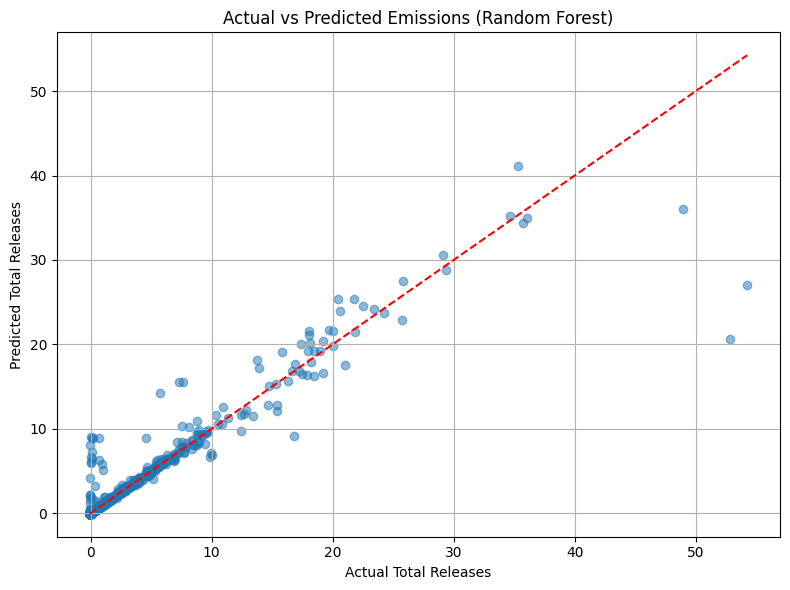

Text(0.5, 1.0, 'Top 15 Feature Importances')

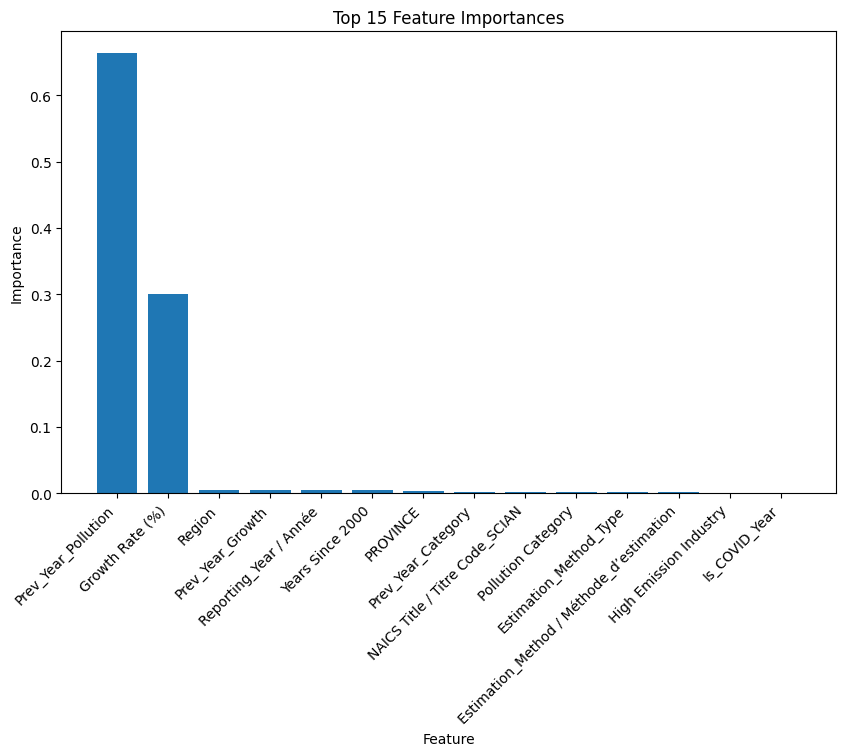

In [112]:
# Step 1: Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)  # Top 15 features

# Step 2: Plot predicted vs actual for a visual check
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Total Releases')
plt.ylabel('Predicted Total Releases')
plt.title('Actual vs Predicted Emissions (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

# plot top feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 15 Feature Importances')
# importance_df.reset_index(drop=True, inplace=True)
# importance_df



# ***Creating Emissions Prediction Report for Evaluation and Analysis***

In [113]:
report = df_regression.loc[X_test.index, [
    "Reporting_Year / Année",
    "NAICS Title / Titre Code_SCIAN",
    "PROVINCE"
]].copy()

report["Actual Emissions"] = y_test.values
report["Predicted Emissions"] = y_pred



In [114]:
# export to csv
report.to_csv("report.csv", index=False)

# ***Time Series Regression Model 2***

In [ ]:
df_reg = df_releases_clean.copy()

To understand which industries are driving changes in pollution levels, we applied linear regression to historical pollutant release data and calculated annual growth rates. The bar chart above visualizes the top 3 industries with the highest predicted growth and the bottom 3 with the sharpest decline over the next five years.

**Industries with the Highest Growth**

Bituminous coal mining

Non-conventional oil extraction

Sewage treatment facilities

These industries show the steepest upward trends, indicating increasing pollutant releases. The rise may be driven by higher production demand or lagging adoption of cleaner technologies. Bituminous coal mining, in particular, stands out with the highest projected increase in emissions per year.

**Industries with the Largest Decline **

Non-ferrous metal (except aluminum) smelting and refining

Fossil-fuel electric power generation

Primary production of alumina and aluminum

These industries are experiencing a downward trend in emissions. This could reflect improvements in environmental regulations, technological upgrades, or shifts toward more sustainable energy and materials processing methods. The non-ferrous metal smelting industry shows the most significant decline.

# ***Label Encoding***

 Why Label Encoding?

Encoding turns categories into numbers so models like Linear Regression can understand them.

Not used for grouping columns (like Industry name), only features used in regression.



Encode Categorical Columns (Label Encoding)

We only need to encode features that we plan to use in our regression model and are non-numeric.

 'PROVINCE', 'Region', 'Estimation_Method_Type', etc.



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



In [ ]:
# List of columns to encode
encode_cols = ['PROVINCE', 'Region', 'Estimation_Method_Type', 'Pollution Category']

le = LabelEncoder()

for col in encode_cols:
    df_reg[col] = le.fit_transform(df_reg[col])


In [ ]:
df_reg.head()

Aggregate Yearly Total Pollution per Industry
We need total releases per industry per year to forecast each industry's pollution over time.

In [ ]:
# Group by Industry and Year, sum pollution
agg_df = df_reg.groupby(['NAICS Title / Titre Code_SCIAN', 'Reporting_Year / Année'])['Total Releases (Summed)'].sum().reset_index()
agg_df.head()


Why Pivot and Group by Industry-Year?

We grouped the data by industry and year to aggregate multiple records and create a clean yearly trend for each sector.

Pivoting the grouped data allowed us to efficiently run time series models (like Linear Regression) for forecasting, ensuring each industry had its own timeline of emissions.r

In [ ]:


# Show all columns when displaying a DataFrame
pd.set_option('display.max_columns', None)

# shpw all rows when displaying a Dataframe
pd.set_option('display.max_rows', None)


In [ ]:
pivot_df = agg_df.pivot(index='Reporting_Year / Année', columns='NAICS Title / Titre Code_SCIAN', values='Total Releases (Summed)')
pivot_df.head()


In [ ]:
# Count of missing values per industry
pivot_df.isna().sum().sort_values(ascending=False)


# Dropping Columns with Too Many NaNs

We Set a Threshold
Let’s say we keep only industries with at least 10 years of data (it can be adjusted ).

Columns (industries) with too many missing values are dropped because they’re not reliable for forecasting.

 Why?

If an industry only reported 1 or 2 years, we can’t train a meaningful time series or regression model.

In [ ]:
# Drop industries with fewer than 10 non-NaN entries
pivot_df_filtered = pivot_df.dropna(axis=1, thresh=10)


# Interpolation

Fills in missing yearly values using linear interpolation

This ensures each industry column has a continuous time series, which is crucial for time-based forecasting

Linear interpolation fills gaps in a way that keeps the trend smooth — ideal for regression models that expect clean input.

In [ ]:
# Interpolate missing values linearly for the remaining industries
pivot_df_filled = pivot_df_filtered.interpolate(method='linear', limit_direction='both')


Confirm Missing Values Are Handled
Check that we are ready for modeling:

In [ ]:
# Check for any remaining NaNs
pivot_df_filled.isna().sum().sort_values(ascending=False)


## *Model 2-Linear Regression*

**Why Linear Regression?**

Linear regression gives us a clear slope ,how fast emissions are increasing or decreasing per year.

With linear models, we can easily compare slopes between industries

Linear regression gives us a growth rate we  can use for ranking

We'll use Linear Regression to predict pollution 5 years into the future for each industry.

In [ ]:
from sklearn.linear_model import LinearRegression


This code is a function that takes one input: the name of the industry we want to forecast.
This selects the time series data (pollution values over the years) for that industry from your cleaned dataset.
It also removes any missing values (NaNs), which could break the regression model.

 We extracts the year from the DataFrame index and reshapes it into a 2D array.
This becomes the feature (also called X) for the model.

Gets the actual pollution values (Total Releases) and reshapes it for modeling.
This is the target (also called y) for the regression model.

Feature = Years

Target = Total Releases (Pollution values )

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

def forecast_industry(industry_name):
    data = pivot_df_filled[industry_name].dropna()
    years = data.index.values.reshape(-1, 1)
    releases = data.values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(years, releases)

    # Predict next 5 years
    last_year = years.max()
    future_years = np.arange(last_year + 1, last_year + 6).reshape(-1, 1)
    future_preds = model.predict(future_years)

    return pd.DataFrame({'Reporting_Year / Année': future_years.flatten(), industry_name: future_preds.flatten()})


In [ ]:
forecast_industry('Aerospace product and parts manufacturing')

This code calculates the yearly growth rate of pollutant emissions for each industry using a linear regression model. It does this by:

Looping through each industry ( each column in pivot_df_filled)

Fitting a linear model where:

x = year (as numbers, like 2000, 2001)

y = total pollutant emissions for that industry

Extracting the slope from the model this represents the growth rate of emissions per year

Saving the slope in a dictionary called growth_summary

Skipping industries with fewer than 10 years of data to ensure reliable trends

Why We Used This Code:
To identify industries with:

Rising emissions (positive slope)

Declining emissions (negative slope)

To directly support the project’s goal:

“Which industry is predicted to have the highest growth of releases in 5 years? Which will have the largest decline?”

Linear regression gives us a clear, explainable trend for each industry over time.



# **Calculating Industry Growth Rates Using Linear Regression**

In [ ]:
# To calculate the growth rate of pollution emissions over time for each industry using linear regression.

from sklearn.linear_model import LinearRegression
import numpy as np

growth_summary = {}

for industry in pivot_df_filled.columns:
    try:
        data = pivot_df_filled[industry].dropna()
        if len(data) < 10:
            continue  # skip if too few data points

        years = data.index.values.reshape(-1, 1)
        releases = data.values.reshape(-1, 1)

        model = LinearRegression()
        model.fit(years, releases)

        slope = model.coef_[0][0]  # growth rate per year
        growth_summary[industry] = slope
    except Exception as e:
        print(f"Skipped {industry} due to error: {e}")


In [ ]:
# To convert the growth_summary dictionary into a clean, sortable DataFrame that shows emission growth rates by industry.
growth_df = pd.DataFrame.from_dict(growth_summary, orient='index', columns=['Growth Rate'])
growth_df.sort_values(by='Growth Rate', ascending=False, inplace=True)
growth_df


# ***Which industry is predicted to have the highest growth of releases in 5 years?***

 The industry with the highest positive slope is expected to have the steepest increase in pollution emissions over the next 5 years. This means it's contributing more to total pollutant releases annually compared to other industries.

In [ ]:
highest_growth_industry = growth_df.iloc[0]
print(f"Highest growth industry: {highest_growth_industry.name}")
print(f"Growth rate: {highest_growth_industry['Growth Rate']:.2f} units/year")


 Justification:

We used Linear Regression to fit a trend line to the past emissions for each industry.

The slope (growth rate) of the line tells us how fast the emissions are increasing or decreasing each year.

A positive slope means emissions are rising, and the one with the largest positive slope is growing the fastest.

# ***Which industry is predicted to have the largest decline in releases in 5 years?***

In [ ]:
largest_decline_industry = growth_df.iloc[-1]
print(f"Largest decline industry: {largest_decline_industry.name}")
print(f"Growth rate: {largest_decline_industry['Growth Rate']:.2f} units/year")


 Justification:

We modeled each industry’s emissions over time and used the slope to represent change per year.

A negative slope indicates declining pollution over time.

The industry with the most negative value is reducing its emissions the fastest.

# ***Model Visualizations***


**Top 3 Growing and Bottom 3 Declining Industries by Emissions:**(horizontal bar chart)

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'growth_df' already exists and is sorted descending
# Select top 3 growing and bottom 3 declining industries
top_3 = growth_df.head(3)
bottom_3 = growth_df.tail(3)

# Combine both for plotting
selected_industries = pd.concat([top_3, bottom_3])
selected_industries.reset_index(inplace=True)
selected_industries.rename(columns={'index': 'Industry'}, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(selected_industries['Industry'], selected_industries['Growth Rate'])
plt.xlabel('Growth Rate (Units/Year)')
plt.title('Top 3 Growing and Declining Industries by Emissions')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()



**Justification:**
The top growing industries, the positive growth rate indicates emissions are increasing at an alarming rate, suggesting that stricter regulations or sustainable practices might be necessary. On the other hand, the bottom declining industries, negative growth rates indicate sectors that are managing to reduce their emissions, showcasing positive trends that could be expanded across other industries.



In [ ]:
import matplotlib.pyplot as plt

# Get historical data
industry_name = "Conventional oil and gas extraction"
historical_data = pivot_df_filled[industry_name].dropna()
historical_years = historical_data.index.values
historical_values = historical_data.values

# Get forecast data
forecast_df = forecast_industry(industry_name)
future_years = forecast_df["Reporting_Year / Année"]
future_values = forecast_df[industry_name]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(historical_years, historical_values, label="Historical", marker='o')
plt.plot(future_years, future_values, label="Forecast (Next 5 Years)", linestyle='--', marker='x')

plt.title(f"Emission Forecast for {industry_name}")
plt.xlabel("Year")
plt.ylabel("Total Releases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Next, we examined the emissions of the **"Conventional oil and gas extraction"** industry. The first plot shows the historical emissions (the actual past data), while the dashed line provides a forecast for the next 5 years.

**Justification**:
By analyzing the historical emissions and the forecast, we can better understand the future path of the oil and gas extraction industry. The use of linear regression to forecast emissions provides an evidence-based prediction whether emissions will continue to rise or stabilize in the future




In [ ]:
#Code for line plot (top growing, top declining industry & histogram for all growth)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Line Plot - Top Growing Industry
top_industry = growth_df.head(1).index[0]
top_data = pivot_df_filled[top_industry].dropna()
years = top_data.index.values.reshape(-1, 1)  #
model_top = LinearRegression()
model_top.fit(years, top_data.values.reshape(-1, 1))

future_years = np.arange(years[-1][0] + 1, years[-1][0] + 6).reshape(-1, 1)
future_preds_top = model_top.predict(future_years)

# 2. Line Plot - Top Declining Industry
bottom_industry = growth_df.tail(1).index[0]
bottom_data = pivot_df_filled[bottom_industry].dropna()
years_b = bottom_data.index.values.reshape(-1, 1)
model_bottom = LinearRegression()
model_bottom.fit(years_b, bottom_data.values.reshape(-1, 1))

future_years_b = np.arange(years_b[-1][0] + 1, years_b[-1][0] + 6).reshape(-1, 1)
future_preds_bottom = model_bottom.predict(future_years_b)

# Plot 1: Top Growing Industry
plt.figure(figsize=(10, 5))
plt.plot(years, top_data.values, label='Historical')
plt.plot(future_years, future_preds_top, linestyle='--', label='Forecast')
plt.title(f'Pollution Forecast: {top_industry}')
plt.xlabel('Year')
plt.ylabel('Total Releases')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Top Declining Industry
plt.figure(figsize=(10, 5))
plt.plot(years_b, bottom_data.values, label='Historical')
plt.plot(future_years_b, future_preds_bottom, linestyle='--', label='Forecast')
plt.title(f'Pollution Forecast: {bottom_industry}')
plt.xlabel('Year')
plt.ylabel('Total Releases')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Histogram of All Growth Rates
plt.figure(figsize=(10, 5))
plt.hist(growth_df['Growth Rate'], bins=30, edgecolor='black')
plt.title('Distribution of Growth Rates Across Industries')
plt.xlabel('Growth Rate (units/year)')
plt.ylabel('Number of Industries')
plt.grid(True)
plt.show()


We then presented **two line plots**:

**Top Growing Industry**: Shows the historical emissions of the industry with the highest growth, along with the forecast for the next 5 years.

**Top Declining Industry**: Shows the historical decline in emissions for the industry with the most significant reduction, along with its forecast.

**Justification:**
Both plots help visualize how these industries might evolve in the future and whether emissions can continue to grow or decline.


**Distribution of Growth Rates Across Industries (Histogram)**:
In the histogram, we see the growth rates of emissions across all industries:

Positive values indicate industries with increasing emissions.

Negative values represent industries with decreasing emissions.



In [ ]:
#Code for Emission Trends of top 5 industries

# Ensure index is treated as actual year
pivot_df_filled.index = pivot_df_filled.index.astype(int)

# Group by year and sum emissions per industry
pivot_grouped = pivot_df_filled.groupby(pivot_df_filled.index).sum()

# Select top 5 industries by total emissions over all years
top_5_industries = pivot_grouped.sum().sort_values(ascending=False).head(5).index
pivot_top_5 = pivot_grouped[top_5_industries]

# Plot the stacked bar chart with actual year labels
ax = pivot_top_5.plot(kind='bar', stacked=True, figsize=(14, 6))
ax.set_xticklabels(pivot_top_5.index.astype(str), rotation=45)
plt.title('Stacked Bar Chart: Emission Trends of Top 5 Industries Over Time')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend(title='Industry')
plt.tight_layout()
plt.show()


 **Stacked Bar Chart: Emission Trends of Top 5 Industries:**
Finally, we looked at the stacked bar chart that shows the emissions from the top 5 industries over time:

Each bar represents one year, and the colored segments within the bars represent the emissions from each of the top 5 industries.

This chart helps us understand how each of these industries has contributed to total emissions year by year. It is useful for identifying trends, such as which industries are becoming bigger polluters or which are improving their environmental performance.
